In [2]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Import CityPy
from citipy import citipy

In [6]:
# Create a list to hold the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import datetime.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd6a8a81f251066c6dc4a149fd6e734b


In [10]:
# Create a list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in list.
for i in range(len(cities)):

    # Group cities in sets of 50 to logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | saskylakh
Processing Record 2 of Set 13 | saldanha
Processing Record 3 of Set 13 | egvekinot
Processing Record 4 of Set 13 | esperance
Processing Record 5 of Set 13 | georgetown
Processing Record 6 of Set 13 | show low
Processing Record 7 of Set 13 | husavik
Processing Record 8 of Set 13 | butaritari
Processing Record 9 of Set 13 | wanaka
Processing Record 10 of Set 13 | carnarvon
Processing Record 11 of Set 13 | severo-kurilsk
Processing Record 12 of Set 13 | fort nelson
Processing Record 13 of Set 13 | praia
Processing Record 14 of Set 13 | ushtobe
Processing Record 15 of Set 13 | rikitea
Processing Record 16 of Set 13 | la asuncion
Processing Record 17 of Set 13 | malumfashi
Processing Record 18 of Set 13 | mataura
Processing Record 19 of Set 13 | oyama
Processing Record 20 of Set 13 | ushuaia
Processing Record 21 of Set 13 | hithadhoo
Processing Record 22 of Set 13 | bethel
Processing Record 23 of Set 13 | puerto ayora
Processing Record 24 of Set 13 

City not found. Skipping...
Processing Record 35 of Set 16 | victoria
Processing Record 36 of Set 16 | lata
Processing Record 37 of Set 16 | longlac
City not found. Skipping...
Processing Record 38 of Set 16 | pingliang
Processing Record 39 of Set 16 | channel-port aux basques
Processing Record 40 of Set 16 | nome
Processing Record 41 of Set 16 | tuktoyaktuk
Processing Record 42 of Set 16 | kidal
Processing Record 43 of Set 16 | port-gentil
Processing Record 44 of Set 16 | port macquarie
Processing Record 45 of Set 16 | byron bay
Processing Record 46 of Set 16 | margate
Processing Record 47 of Set 16 | robe
Processing Record 48 of Set 16 | faanui
Processing Record 49 of Set 16 | inverness
Processing Record 50 of Set 16 | richards bay
Processing Record 1 of Set 17 | sambava
Processing Record 2 of Set 17 | dunedin
Processing Record 3 of Set 17 | sistranda
Processing Record 4 of Set 17 | qianan
Processing Record 5 of Set 17 | vestmannaeyjar
Processing Record 6 of Set 17 | kupang
Processin

Processing Record 16 of Set 20 | dakar
Processing Record 17 of Set 20 | tautira
Processing Record 18 of Set 20 | mayumba
Processing Record 19 of Set 20 | tessalit
Processing Record 20 of Set 20 | verkhnyaya inta
Processing Record 21 of Set 20 | samusu
City not found. Skipping...
Processing Record 22 of Set 20 | san vicente
Processing Record 23 of Set 20 | ostrovnoy
Processing Record 24 of Set 20 | panaba
Processing Record 25 of Set 20 | platanos
Processing Record 26 of Set 20 | fallon
Processing Record 27 of Set 20 | mombetsu
Processing Record 28 of Set 20 | sarakhs
Processing Record 29 of Set 20 | miragoane
Processing Record 30 of Set 20 | manggar
Processing Record 31 of Set 20 | honningsvag
Processing Record 32 of Set 20 | shihezi
Processing Record 33 of Set 20 | januaria
Processing Record 34 of Set 20 | yeppoon
Processing Record 35 of Set 20 | kotra
Processing Record 36 of Set 20 | seminole
Processing Record 37 of Set 20 | sekoma
Processing Record 38 of Set 20 | lavrentiya
Processin

Processing Record 3 of Set 24 | lagos de moreno
Processing Record 4 of Set 24 | zhigansk
Processing Record 5 of Set 24 | kirensk
Processing Record 6 of Set 24 | touros
Processing Record 7 of Set 24 | carballo
Processing Record 8 of Set 24 | verkhnevilyuysk
Processing Record 9 of Set 24 | colwyn bay
Processing Record 10 of Set 24 | belaya gora
Processing Record 11 of Set 24 | nalut
Processing Record 12 of Set 24 | sai buri
Processing Record 13 of Set 24 | road town
Processing Record 14 of Set 24 | souillac
Processing Record 15 of Set 24 | avera
Processing Record 16 of Set 24 | talakan
Processing Record 17 of Set 24 | ayagoz
Processing Record 18 of Set 24 | kiunga
Processing Record 19 of Set 24 | tapes
Processing Record 20 of Set 24 | shingu
Processing Record 21 of Set 24 | padang
Processing Record 22 of Set 24 | porto novo
Processing Record 23 of Set 24 | mkushi
Processing Record 24 of Set 24 | grindavik
Processing Record 25 of Set 24 | vardo
Processing Record 26 of Set 24 | yuancheng
P

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.92,114.08,-13.09,88,100,13.98,RU,2020-12-26 15:27:22
1,Saldanha,-33.01,17.94,77.00,53,21,19.46,ZA,2020-12-26 15:27:22
2,Egvekinot,66.32,-179.17,4.86,88,8,13.11,RU,2020-12-26 15:27:23
3,Esperance,-33.87,121.90,59.00,87,75,14.99,AU,2020-12-26 15:27:23
4,Georgetown,5.41,100.34,77.00,94,40,2.24,MY,2020-12-26 15:27:23
5,Show Low,34.25,-110.03,28.40,42,1,8.05,US,2020-12-26 15:27:23
6,Husavik,66.04,-17.34,23.00,85,0,6.02,IS,2020-12-26 15:22:33
7,Butaritari,3.07,172.79,80.74,79,16,14.25,KI,2020-12-26 15:27:23
8,Wanaka,-44.70,169.15,41.00,69,35,1.01,NZ,2020-12-26 15:23:59
9,Carnarvon,-24.87,113.63,75.20,100,75,23.04,AU,2020-12-26 15:27:23


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2020-12-26 15:27:22,71.92,114.08,-13.09,88,100,13.98
1,Saldanha,ZA,2020-12-26 15:27:22,-33.01,17.94,77.00,53,21,19.46
2,Egvekinot,RU,2020-12-26 15:27:23,66.32,-179.17,4.86,88,8,13.11
3,Esperance,AU,2020-12-26 15:27:23,-33.87,121.90,59.00,87,75,14.99
4,Georgetown,MY,2020-12-26 15:27:23,5.41,100.34,77.00,94,40,2.24
...,...,...,...,...,...,...,...,...,...
552,Bambanglipuro,ID,2020-12-26 15:28:44,-7.95,110.28,77.83,83,100,1.83
553,Vostok,RU,2020-12-26 15:28:44,46.49,135.88,-17.23,89,20,6.26
554,Zhengjiatun,CN,2020-12-26 15:28:45,43.51,123.51,10.20,87,1,2.59
555,Obihiro,JP,2020-12-26 15:27:11,42.92,143.20,17.47,83,25,14.65


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'12/26/20'

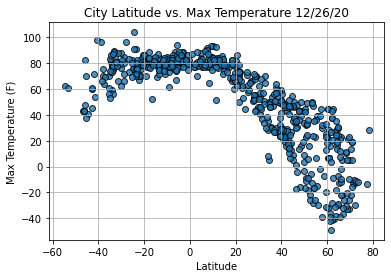

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

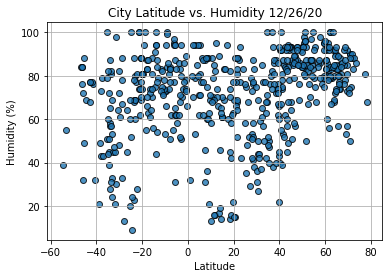

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

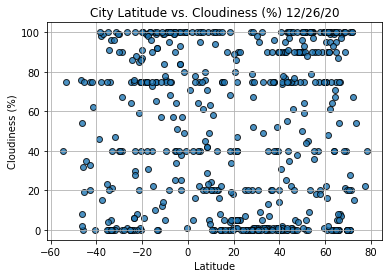

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

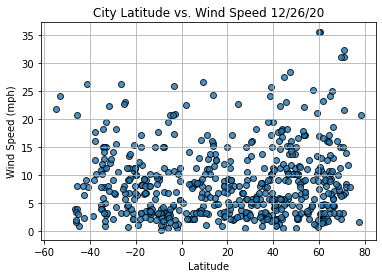

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                      Ushtobe
Country                        KZ
Date          2020-12-26 15:27:24
Lat                         45.25
Lng                         77.98
Max Temp                     8.83
Humidity                       93
Cloudiness                     22
Wind Speed                   9.26
Name: 13, dtype: object

In [25]:
city_data_df['Lat'] >=0

0       True
1      False
2       True
3      False
4       True
       ...  
552    False
553     True
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2020-12-26 15:27:22,71.92,114.08,-13.09,88,100,13.98
2,Egvekinot,RU,2020-12-26 15:27:23,66.32,-179.17,4.86,88,8,13.11
4,Georgetown,MY,2020-12-26 15:27:23,5.41,100.34,77.00,94,40,2.24
5,Show Low,US,2020-12-26 15:27:23,34.25,-110.03,28.40,42,1,8.05
6,Husavik,IS,2020-12-26 15:22:33,66.04,-17.34,23.00,85,0,6.02
...,...,...,...,...,...,...,...,...,...
551,Makat,KZ,2020-12-26 15:28:44,47.65,53.35,13.86,92,0,11.86
553,Vostok,RU,2020-12-26 15:28:44,46.49,135.88,-17.23,89,20,6.26
554,Zhengjiatun,CN,2020-12-26 15:28:45,43.51,123.51,10.20,87,1,2.59
555,Obihiro,JP,2020-12-26 15:27:11,42.92,143.20,17.47,83,25,14.65


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

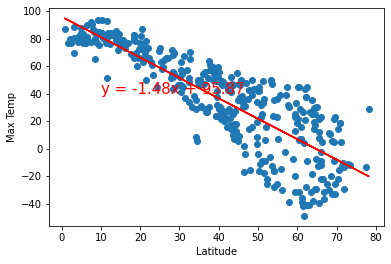

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

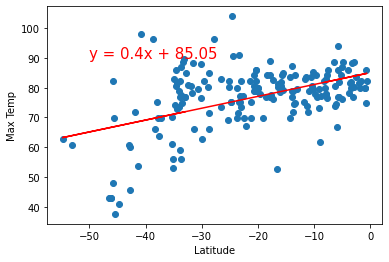

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

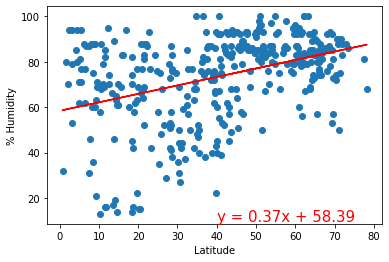

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

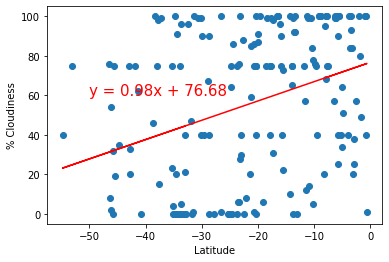

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

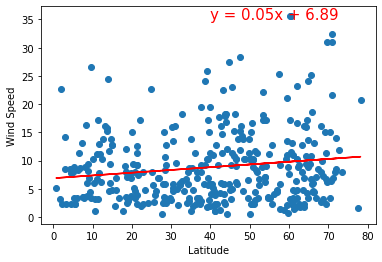

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

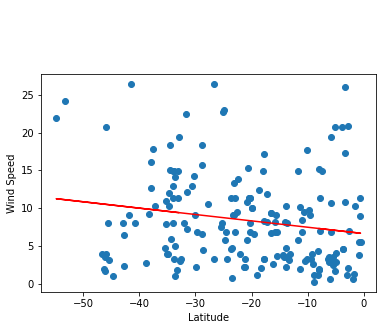

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))